## Computer Vision 9nd Assignment
## Melika Heydari Rad 
#### Maktabkhooneh Course 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

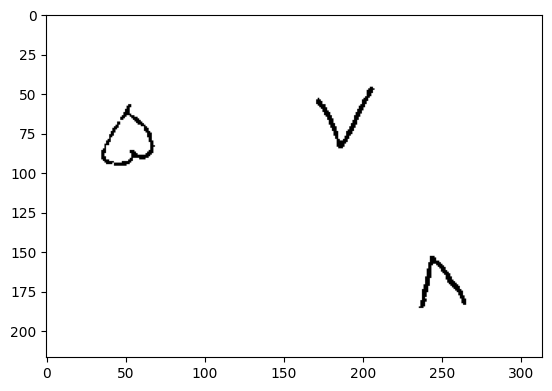

In [4]:
img =  cv2.imread('adad.jpg',0)
noise_removed_img = cv2.GaussianBlur(img, (9,9), 0)

binary_img = cv2.adaptiveThreshold(noise_removed_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,5,2)
plt.imshow(binary_img, cmap='gray')

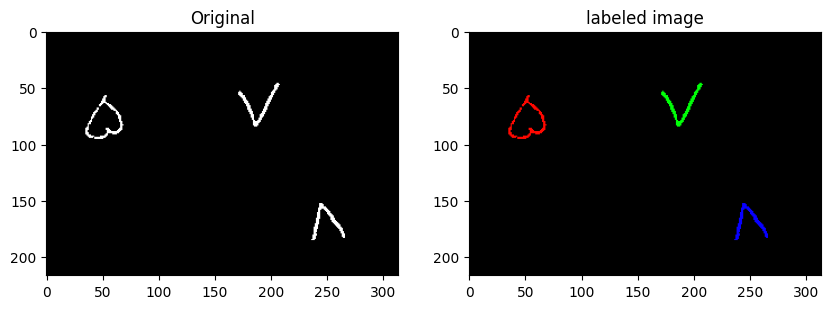

In [5]:
binary_img_inv = cv2.bitwise_not(binary_img)
num_labels, labels = cv2.connectedComponents(binary_img_inv)

# Map component labels to hue val, 0-179 is the hue range in OpenCV
label_hue = np.uint8(179*labels/np.max(labels))
blank = np.ones_like(binary_img_inv) * 255
labeled_img = cv2.merge([label_hue, blank, blank])

# Converting cvt to BGR
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0


plt.figure(figsize=[10,8])
plt.subplot(121);plt.imshow(binary_img_inv, cmap='gray');plt.title("Original");
plt.subplot(122);plt.imshow(labeled_img, cmap='gray');plt.title("labeled image");

In [42]:
# number of digits

num_components = num_labels-1  # ignoring background label
num_components

3